In [21]:
import pandas as pd
import csv
import sys
import StringIO
import os

prepath = "/Users/mattzhang/Dropbox/Projects/Data/Zillow/"
properties = pd.read_csv(prepath+"properties_2016.csv")

In [40]:
# sensible dataset names, from https://www.kaggle.com/philippsp/exploratory-analysis-zillow
# also, make text-based values numeric

properties = properties.rename(columns={
    'parcelid': 'id_parcel',
    'yearbuilt': 'build_year',
    'basementsqft': 'area_basement',
    'yardbuildingsqft17': 'area_patio',
    'yardbuildingsqft26': 'area_shed',
    'poolsizesum': 'area_pool',
    'lotsizesquarefeet': 'area_lot',
    'garagetotalsqft': 'area_garage',
    'finishedfloor1squarefeet': 'area_firstfloor_finished',
    'calculatedfinishedsquarefeet': 'area_total_calc',
    'finishedsquarefeet6': 'area_base',
    'finishedsquarefeet12': 'area_live_finished',
    'finishedsquarefeet13': 'area_liveperi_finished',
    'finishedsquarefeet15': 'area_total_finished',
    'finishedsquarefeet50': 'area_unknown',
    'unitcnt': 'num_unit',
    'numberofstories': 'num_story',
    'roomcnt': 'num_room',
    'bathroomcnt': 'num_bathroom',
    'bedroomcnt': 'num_bedroom',
    'calculatedbathnbr': 'num_bathroom_calc',
    'fullbathcnt': 'num_bath',
    'threequarterbathnbr': 'num_75_bath',
    'fireplacecnt': 'num_fireplace',
    'poolcnt': 'num_pool',
    'garagecarcnt': 'num_garage',
    'regionidcounty': 'region_county',
    'regionidcity': 'region_city',
    'regionidzip': 'region_zip',
    'regionidneighborhood': 'region_neighbor',
    'taxvaluedollarcnt': 'tax_total',
    'structuretaxvaluedollarcnt': 'tax_building',
    'landtaxvaluedollarcnt': 'tax_land',
    'taxamount': 'tax_property',
    'assessmentyear': 'tax_year',
    'taxdelinquencyflag': 'tax_delinquency',
    'taxdelinquencyyear': 'tax_delinquency_year',
    'propertyzoningdesc': 'zoning_property',
    'propertylandusetypeid': 'zoning_landuse',
    'propertycountylandusecode': 'zoning_landuse_county',
    'fireplaceflag': 'flag_fireplace',
    'hashottuborspa': 'flag_tub',
    'buildingqualitytypeid': 'quality',
    'buildingclasstypeid': 'framing',
    'typeconstructiontypeid': 'material',
    'decktypeid': 'deck',
    'storytypeid': 'story',
    'heatingorsystemtypeid': 'heating',
    'airconditioningtypeid': 'aircon',
    'architecturalstyletypeid': 'architectural_style'
});

# treat no info as equal to no tax delinquency
properties['tax_delinquency'] = [int(i == 'Y') for i in properties['tax_delinquency']]
# assume no fireplace if not stated
properties['flag_fireplace'] = [int(i == 'Y') for i in properties['flag_fireplace']]
# assume no hot tub present
properties['flag_tub'] = [int(i == 'Y') for i in properties['flag_tub']]

In [39]:
properties.head()

,id_parcel,aircon,architectural_style,area_basement,num_bathroom,num_bedroom,framing,quality,num_bathroom_calc,deck,...,num_story,flag_fireplace,tax_building,tax_total,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,9.0,2015.0,9.0,NaN,0,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,27516.0,2015.0,27516.0,NaN,0,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,0,650756.0,1413387.0,2015.0,762631.0,20800.37,0,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,0,571346.0,1156834.0,2015.0,585488.0,14557.57,0,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,0,193796.0,433491.0,2015.0,239695.0,5725.17,0,NaN,NaN


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

parcelid


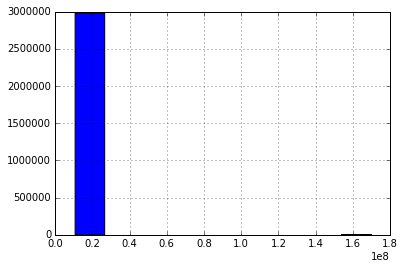

airconditioningtypeid


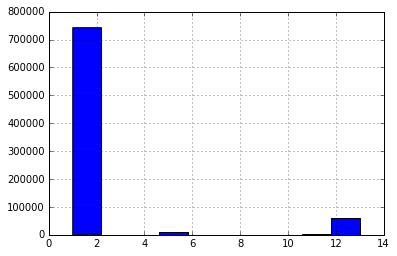

architecturalstyletypeid


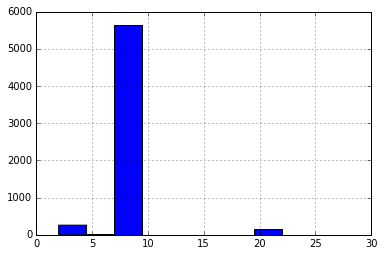

basementsqft


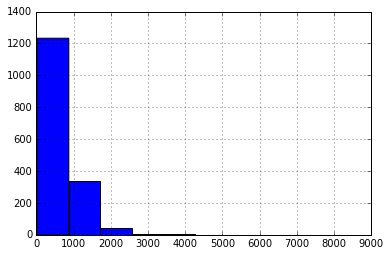

bathroomcnt


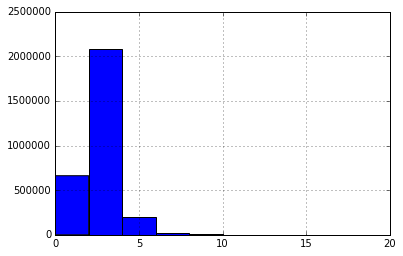

bedroomcnt


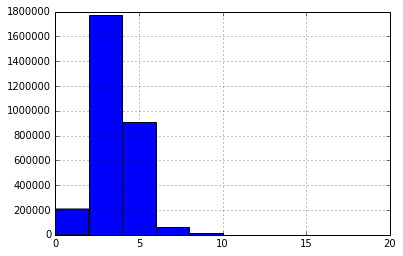

buildingclasstypeid


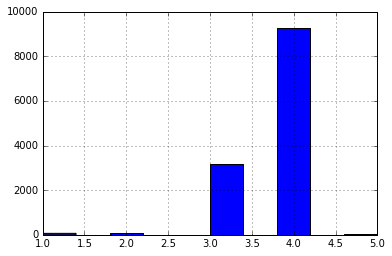

buildingqualitytypeid


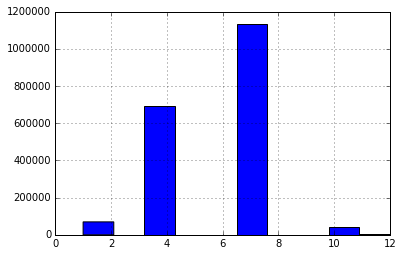

calculatedbathnbr


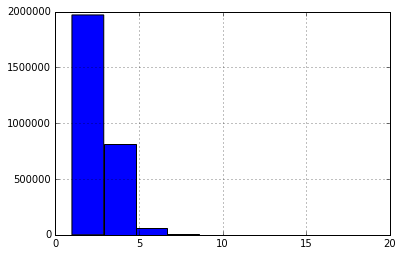

decktypeid


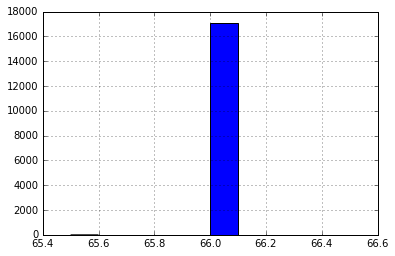

finishedfloor1squarefeet


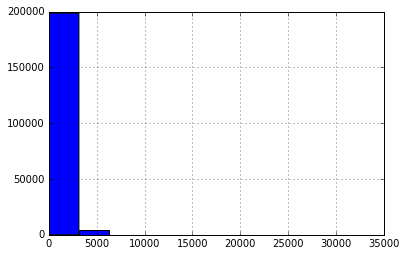

calculatedfinishedsquarefeet


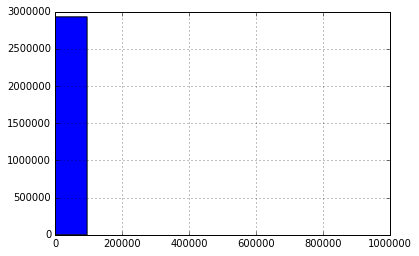

finishedsquarefeet12


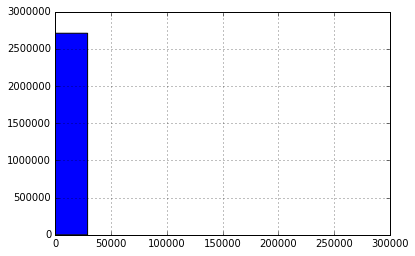

finishedsquarefeet13


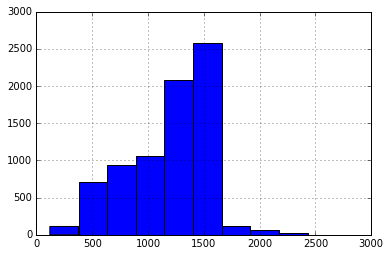

finishedsquarefeet15


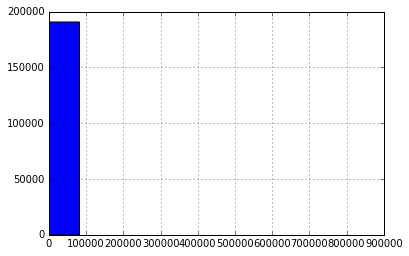

finishedsquarefeet50


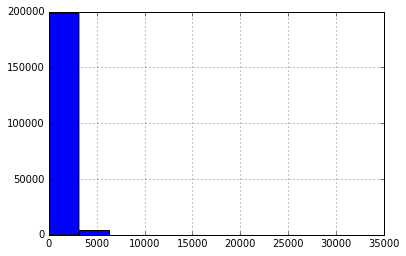

finishedsquarefeet6


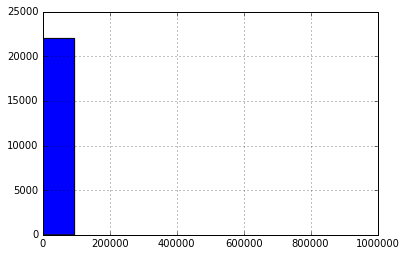

fips


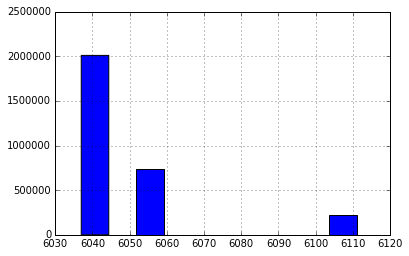

fireplacecnt


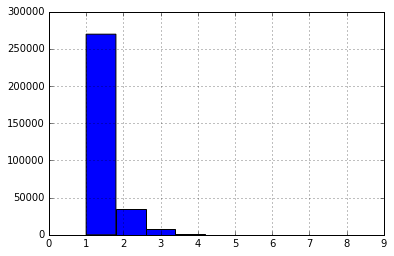

fullbathcnt


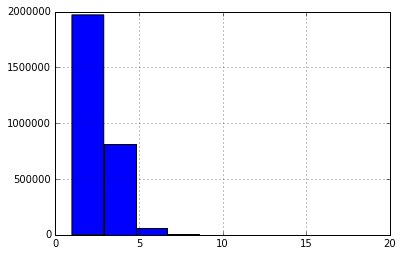

garagecarcnt


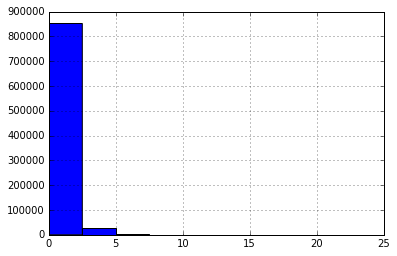

garagetotalsqft


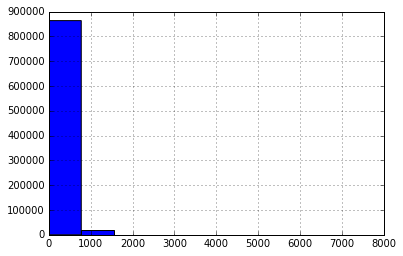

hashottuborspa


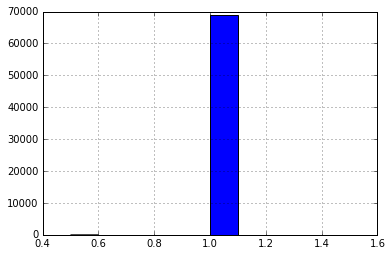

heatingorsystemtypeid


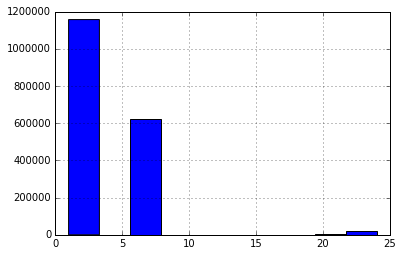

latitude


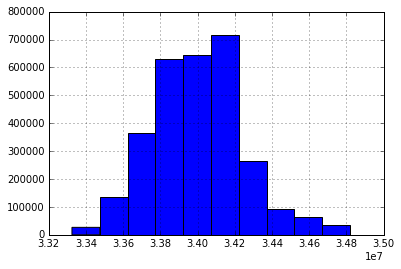

longitude


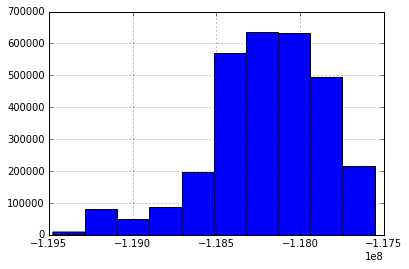

lotsizesquarefeet


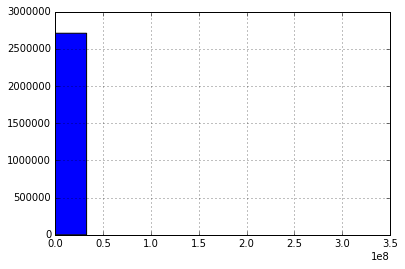

poolcnt


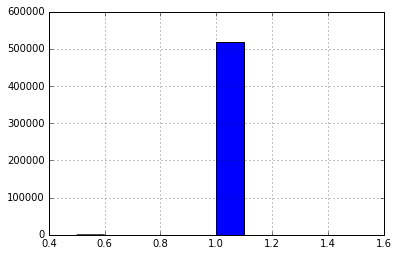

poolsizesum


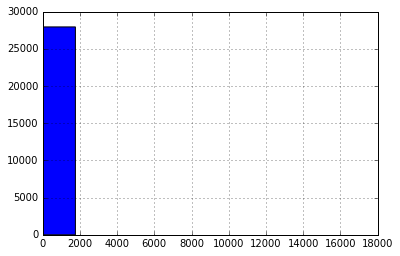

pooltypeid10


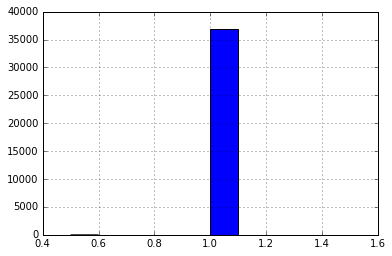

pooltypeid2


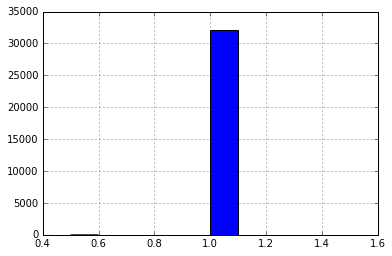

pooltypeid7


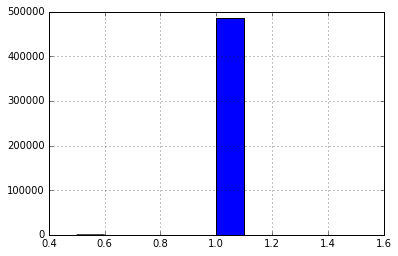

propertycountylandusecode


TypeError: cannot concatenate 'str' and 'float' objects

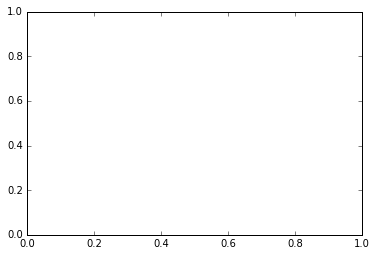

In [5]:
for feature in list(properties):
    print feature
    properties[feature].hist()
    plt.show()

In [60]:
errors = pd.read_csv(prepath+"train_2016_v2.csv")

In [61]:
errors = errors.assign(transaction_year = pd.Series([int(i.split('-')[0]) for i in errors['transactiondate']]).values)
errors = errors.assign(transaction_month = pd.Series([int(i.split('-')[1]) for i in errors['transactiondate']]).values)
errors = errors.assign(transaction_day = pd.Series([int(i.split('-')[2]) for i in errors['transactiondate']]).values)
errors = errors.drop('transactiondate', 1)

In [107]:
errors = errors.rename(columns={
    'parcelid': 'id_parcel'});

In [105]:
errors.head()

,parcelid,logerror,transaction_year,transaction_month,transaction_day
0,11016594,0.0276,2016,1,1
1,14366692,-0.1684,2016,1,1
2,12098116,-0.0040,2016,1,1
3,12643413,0.0218,2016,1,2
4,14432541,-0.0050,2016,1,2


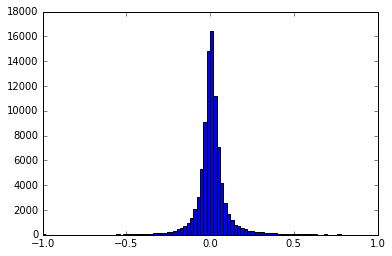

In [63]:
plt.hist(errors['logerror'], bins=np.arange(-1, 1, 0.02));

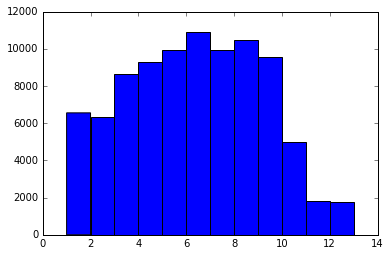

In [92]:
plt.hist(errors['transaction_month'], bins=range(1,14));

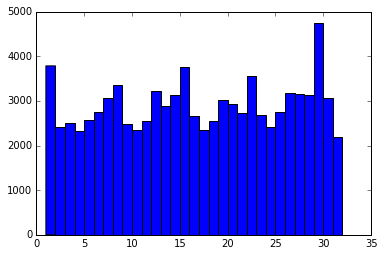

In [93]:
plt.hist(errors['transaction_day'], bins=range(1,33));

In [115]:
# add together properties and errors data
properties = properties.merge(errors, left_on='id_parcel', right_on='id_parcel', how='outer');

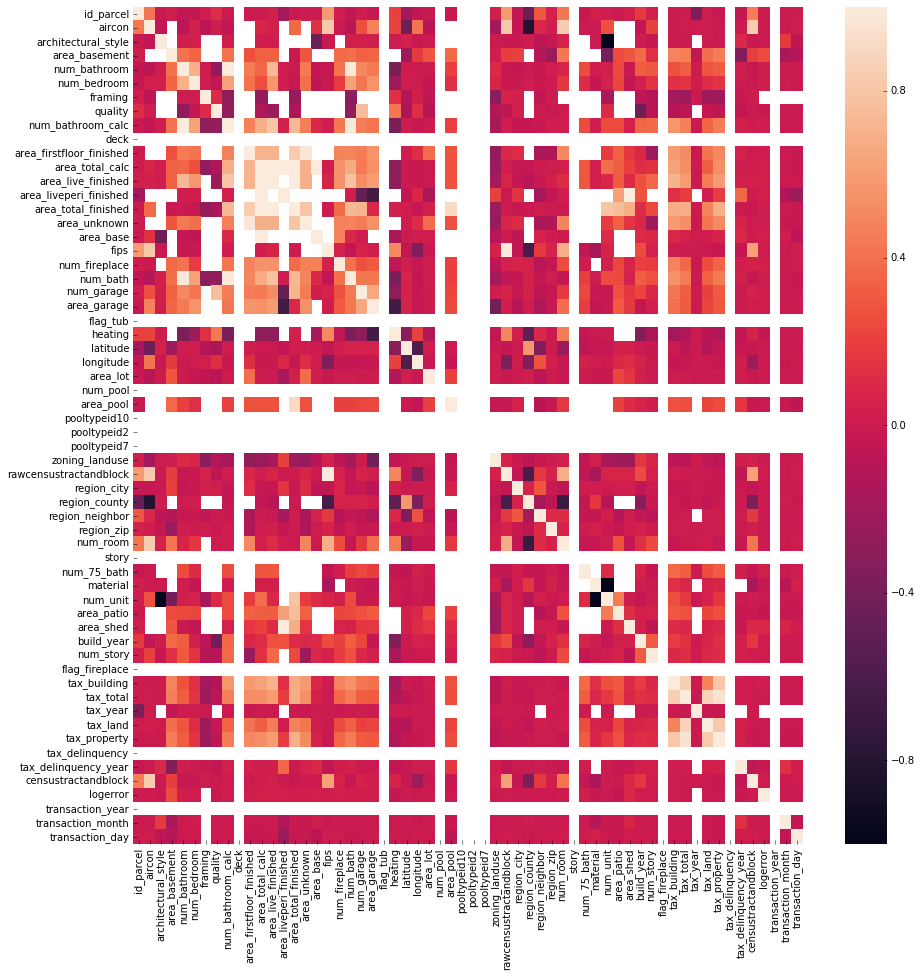

In [116]:
import seaborn as sb
corr = properties.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           ax=ax);

id_parcel


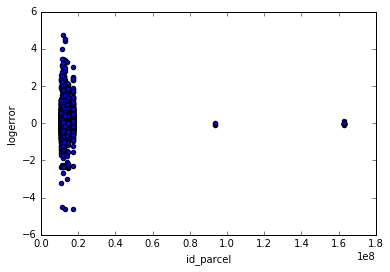

aircon


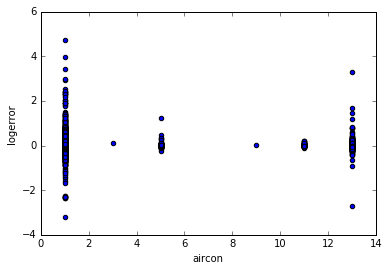

architectural_style


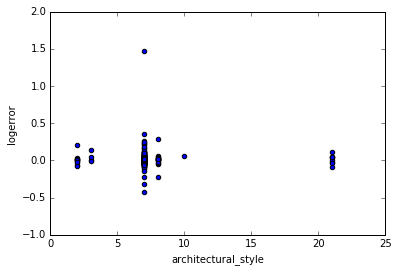

area_basement


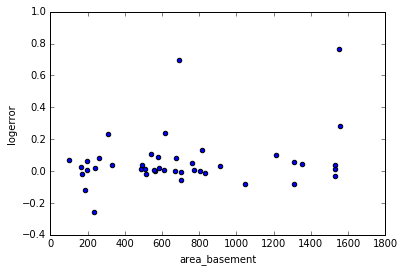

num_bathroom


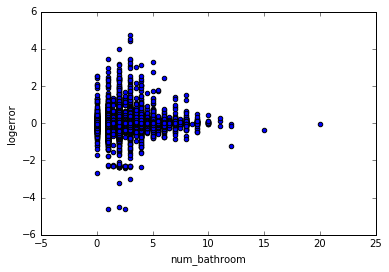

num_bedroom


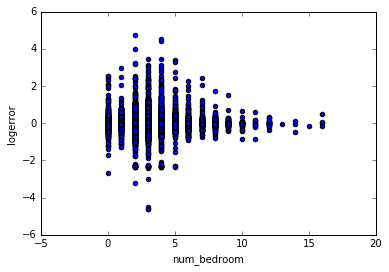

framing


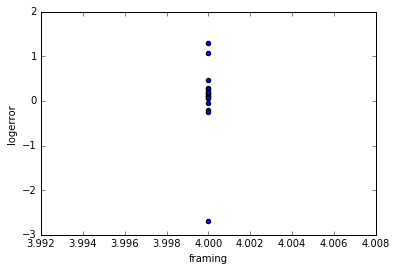

quality


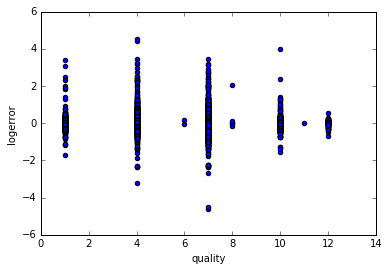

num_bathroom_calc


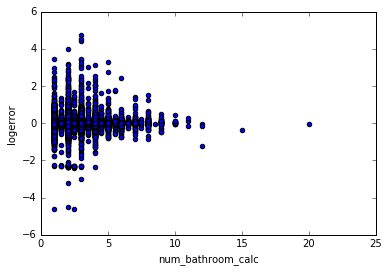

deck


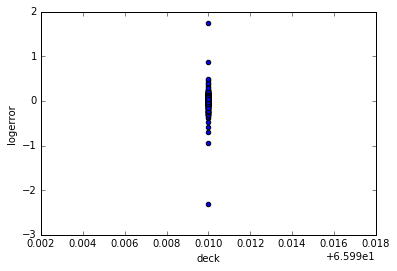

area_firstfloor_finished


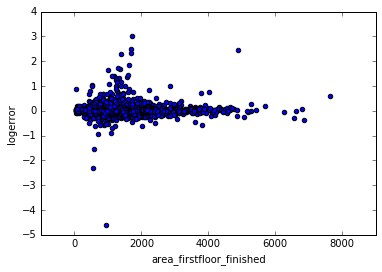

area_total_calc


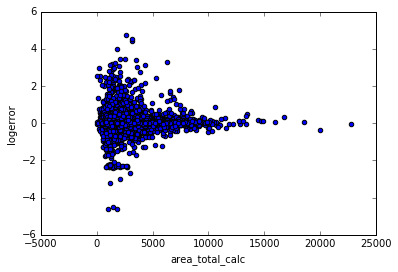

area_live_finished


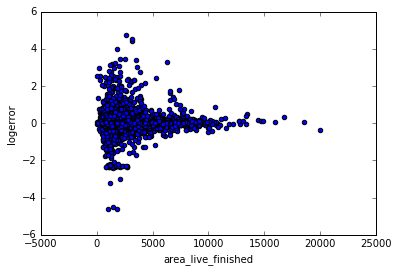

area_liveperi_finished


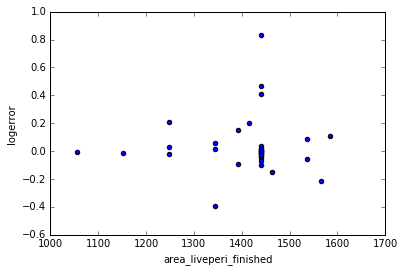

area_total_finished


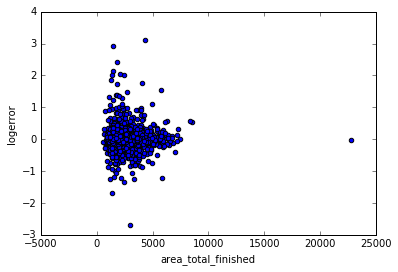

area_unknown


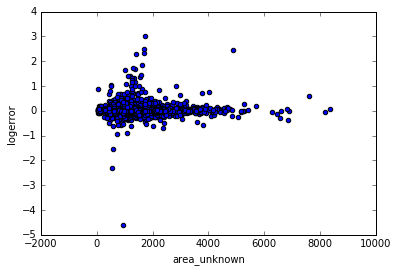

area_base


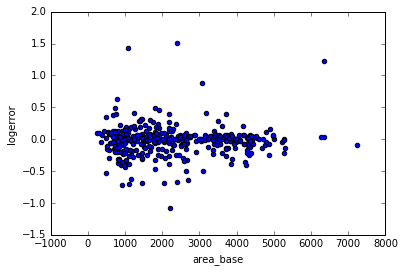

fips


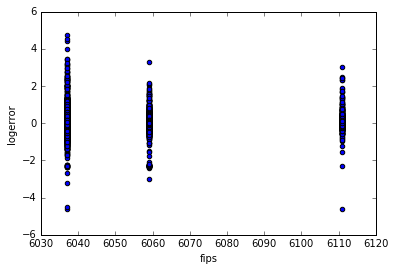

num_fireplace


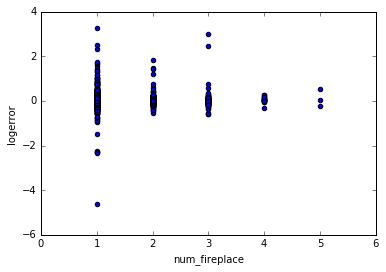

num_bath


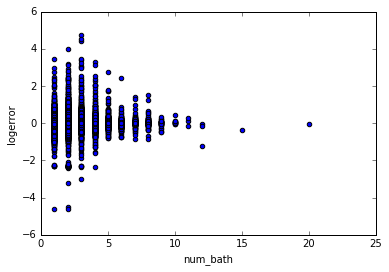

num_garage


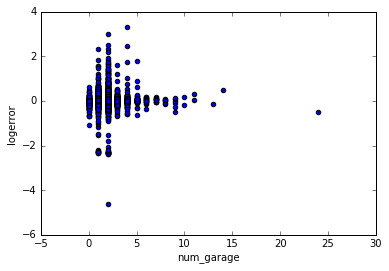

area_garage


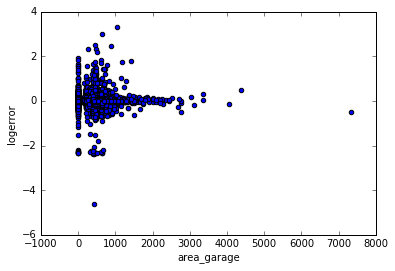

flag_tub


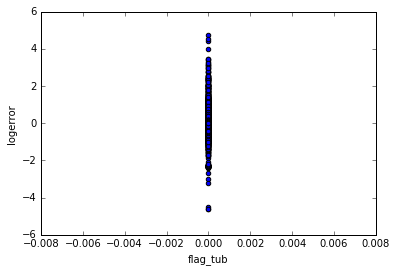

heating


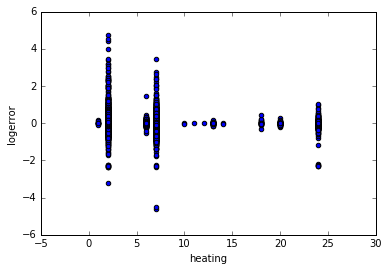

latitude


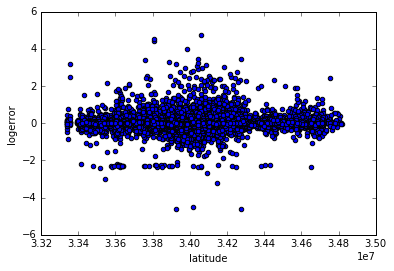

longitude


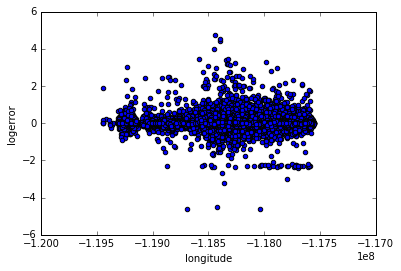

area_lot


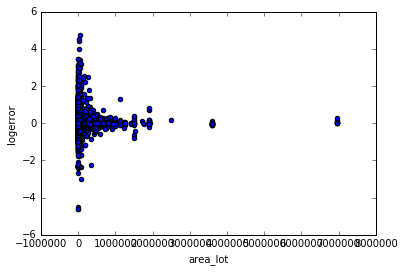

num_pool


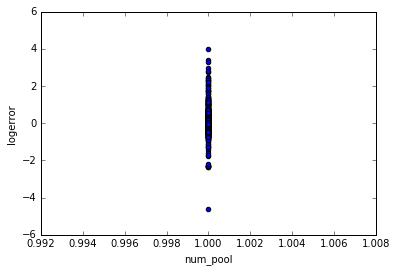

area_pool


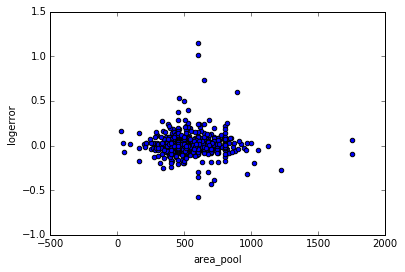

pooltypeid10


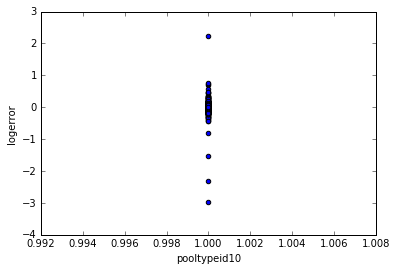

pooltypeid2


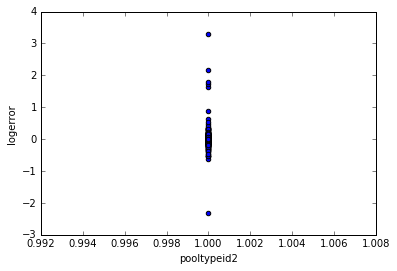

pooltypeid7


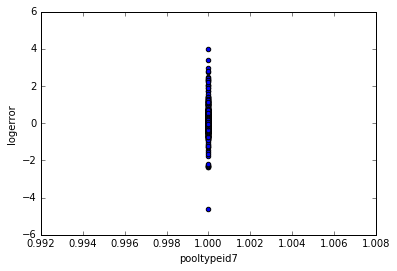

zoning_landuse


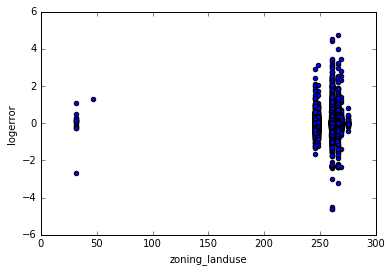

rawcensustractandblock


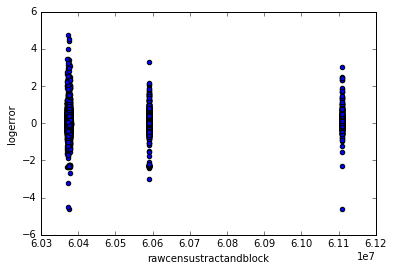

region_city


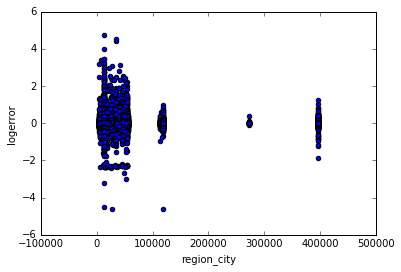

region_county


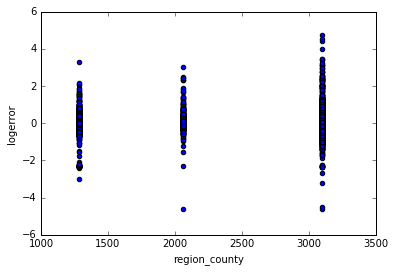

region_neighbor


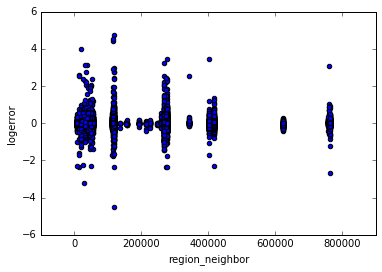

region_zip


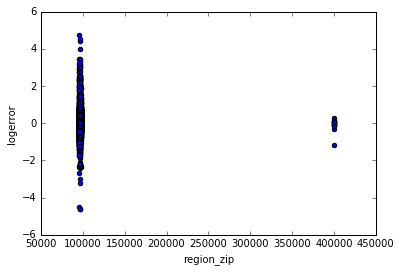

num_room


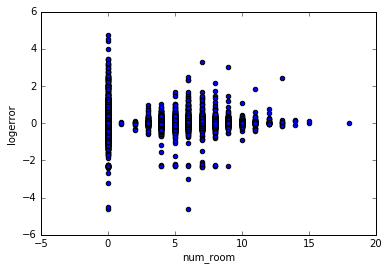

story


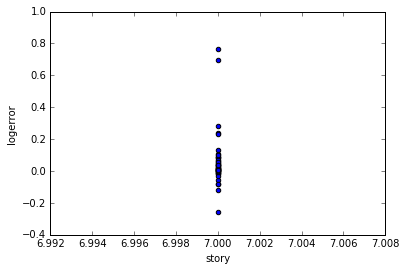

num_75_bath


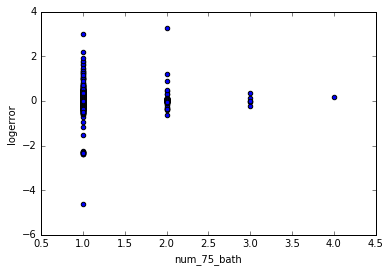

material


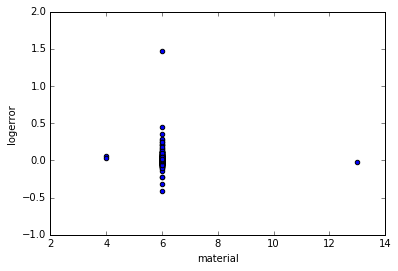

num_unit


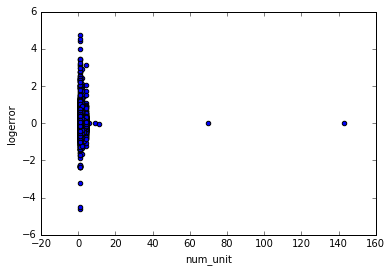

area_patio


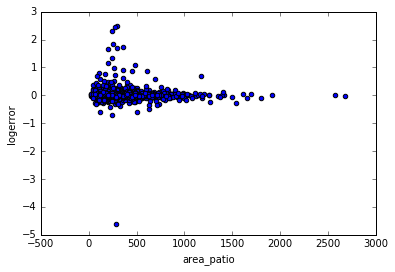

area_shed


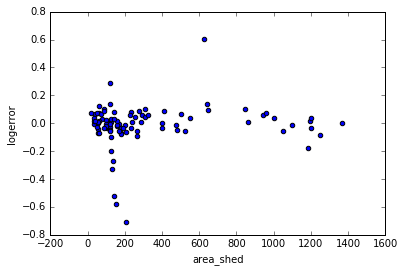

build_year


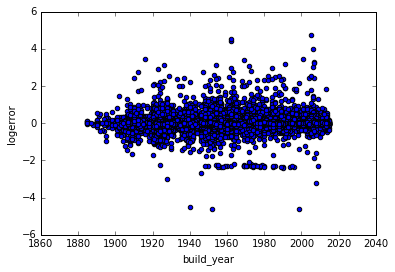

num_story


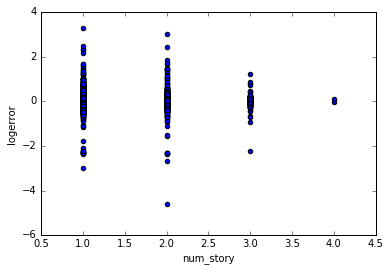

flag_fireplace


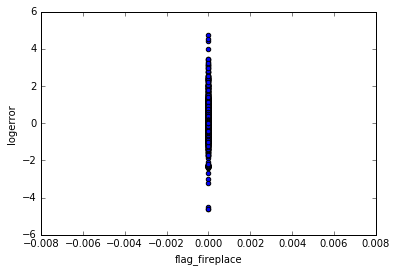

tax_building


In [ ]:
skippedFeatures = ['zoning_landuse_county', 'zoning_property']
for feature in list(properties):
    if feature in skippedFeatures: continue
    print feature
    plt.scatter(properties[feature], properties['logerror'])
    plt.xlabel(feature)
    plt.ylabel('logerror')
    plt.show()